In [2]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sampleSubmission.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


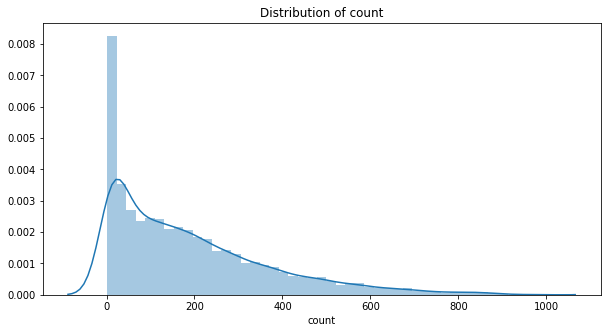

In [9]:
f,ax=plt.subplots(figsize=(10,5))
sns.distplot(train['count'])
ax.set_title('Distribution of count')
plt.savefig(r'e:python\pic\Distribution of count',dpi=200)

In [11]:
train_WithoutOutliers=train[np.abs(train['count']-train['count'].mean())<=3*train['count'].std()]
train_WithoutOutliers.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000
mean,2.500978,0.028960,0.676786,1.420710,20.130507,23.548846,62.049632,12.787706,35.220039,147.783779,183.003818
std,1.119043,0.167702,0.467726,0.634956,7.777571,8.463179,19.241364,8.171075,49.546882,136.370597,166.681429
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,41.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,116.000000,141.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,47.000000,217.000000,276.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,712.000000,734.000000


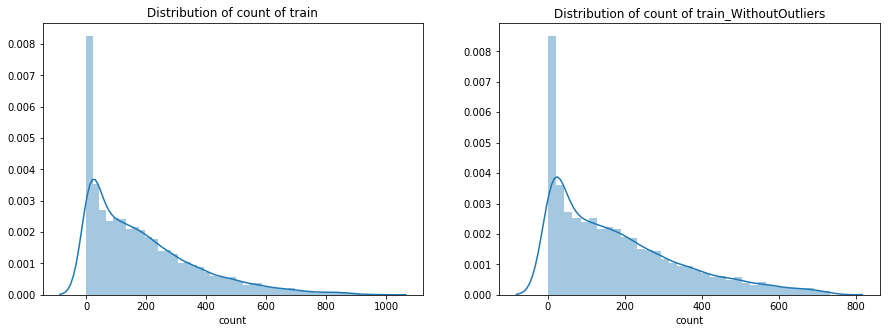

In [12]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['count'],ax=ax1)
sns.distplot(train_WithoutOutliers['count'],ax=ax2)
ax1.set_title('Distribution of count of train')
ax2.set_title('Distribution of count of train_WithoutOutliers')
plt.savefig(r'e:python\pic\Distribution of count of 2',dpi=200)

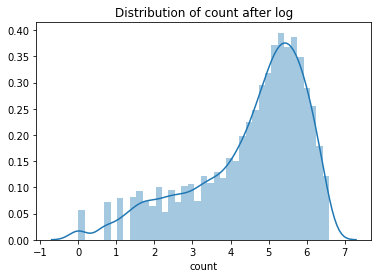

In [14]:
yLabels=np.log(train_WithoutOutliers['count'])
train_WithoutOutliers['count_log']=yLabels
sns.distplot(yLabels)
plt.title('Distribution of count after log')
plt.savefig(r'log')

In [15]:
#合并数据集
df=train_WithoutOutliers.append(test,ignore_index=True)
#合并后发现列是乱的，从新排下列
df=pd.DataFrame(df,columns=train_WithoutOutliers.columns)
df.shape

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(17232, 13)

In [16]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2.772589
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,3.688879
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,3.465736
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2.564949
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,0.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 13 columns):
datetime      17232 non-null object
season        17232 non-null int64
holiday       17232 non-null int64
workingday    17232 non-null int64
weather       17232 non-null int64
temp          17232 non-null float64
atemp         17232 non-null float64
humidity      17232 non-null int64
windspeed     17232 non-null float64
casual        10739 non-null float64
registered    10739 non-null float64
count         10739 non-null float64
count_log     10739 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 1.7+ MB


In [18]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')

In [19]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['weekday']=df['datetime'].dt.weekday
df['hour']=df['datetime'].dt.hour
#查看df的基本信息
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2.772589,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,3.688879,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,3.465736,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2.564949,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,0.000000,2011,1,5,4


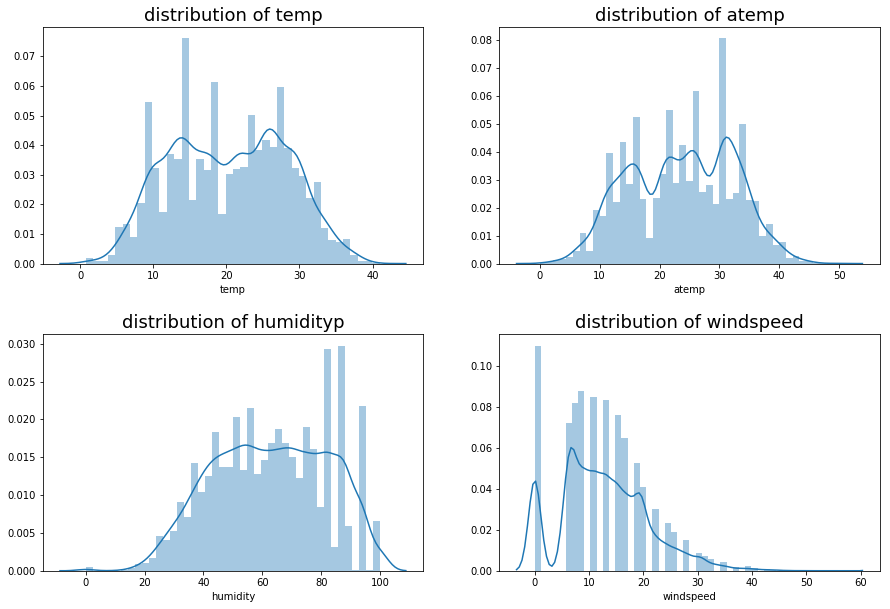

In [21]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.distplot(df['temp'],ax=ax[0,0])
sns.distplot(df['atemp'],ax=ax[0,1])
sns.distplot(df['humidity'],ax=ax[1,0])
sns.distplot(df['windspeed'],ax=ax[1,1])
ax[0,0].set_title('distribution of temp',fontsize=18)
ax[0,1].set_title('distribution of atemp',fontsize=18)
ax[1,0].set_title('distribution of humidityp',fontsize=18)
ax[1,1].set_title('distribution of windspeed',fontsize=18)
plt.subplots_adjust(hspace=.3)
plt.savefig(r'Distribution of all',dpi=200)

In [22]:
#使用随机森林回归来预测风速
from sklearn.ensemble import RandomForestRegressor
#将风速分为0和非0两部分
windspeed_0=df[df['windspeed']==0]
windspeed_not0=df[df['windspeed']!=0]
#选定模型
rf_model=RandomForestRegressor(n_estimators=1000,random_state=42)
#选择特征
windcolumns=['season','weather','humidity','month','temp','year','atemp']
#模型训练
rf_model=rf_model.fit(windspeed_not0[windcolumns],windspeed_not0['windspeed'])
#模型预测
pred=rf_model.predict(windspeed_0[windcolumns])
#将预测好的风速值填充到数据中
windspeed_0.loc[:,'windspeed']=pred
#链接两部分数据
df_rfw=windspeed_0.append(windspeed_not0)
df_rfw.reset_index(inplace=True)
df_rfw.drop('index',axis=1,inplace=True)

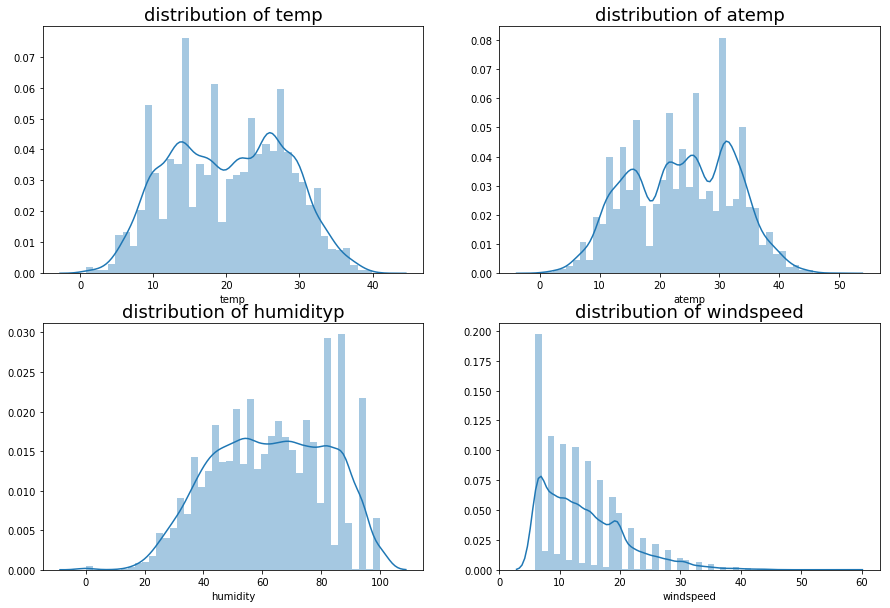

In [24]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.distplot(df_rfw['temp'],ax=ax[0,0])
sns.distplot(df_rfw['atemp'],ax=ax[0,1])
sns.distplot(df_rfw['humidity'],ax=ax[1,0])
sns.distplot(df_rfw['windspeed'],ax=ax[1,1])
ax[0,0].set_title('distribution of temp',fontsize=18)
ax[0,1].set_title('distribution of atemp',fontsize=18)
ax[1,0].set_title('distribution of humidityp',fontsize=18)
ax[1,1].set_title('distribution of windspeed',fontsize=18)
plt.savefig(r'distribution of all2')


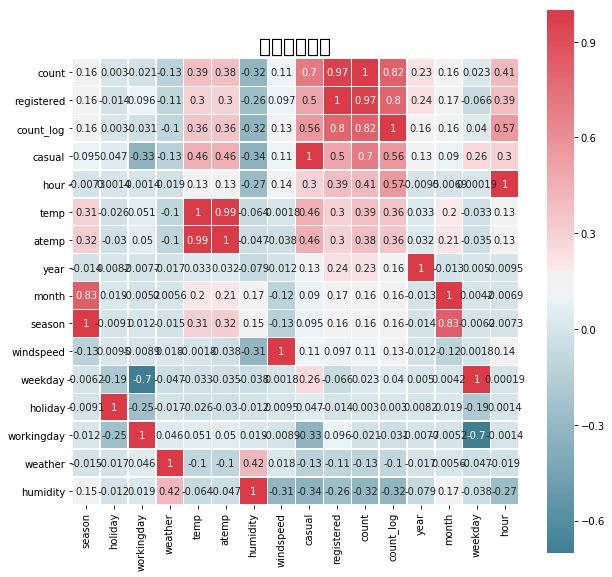

In [25]:
a=df_rfw.corr().sort_values('count',ascending=False)
f,ax=plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(a,ax=ax,square=True,lw=.3,cmap=cmap,annot=True)
ax.set_title('相关系数矩阵',fontsize=20)
plt.savefig(r'e:python\pic\heatmap of corr',dpi=200,vmax=1)

In [26]:
a.sort_values('count',ascending=False)['count']

count         1.000000
registered    0.966209
count_log     0.818451
casual        0.704764
hour          0.405437
temp          0.385954
atemp         0.381967
year          0.234959
month         0.164673
season        0.159801
windspeed     0.111783
weekday       0.022602
holiday       0.002978
workingday   -0.020764
weather      -0.127519
humidity     -0.317028
Name: count, dtype: float64

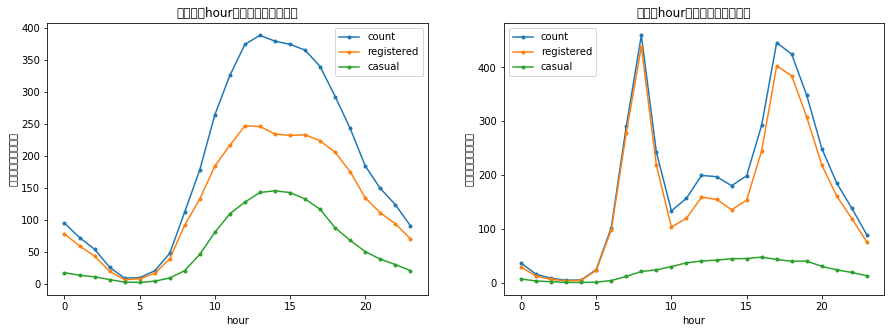

In [28]:
columns_count=['count','registered','casual']
df_hour_work0=df_rfw.loc[df_rfw['workingday']==0,:].groupby('hour')[columns_count].mean()
df_hour_work1=df_rfw.loc[df_rfw['workingday']==1,:].groupby('hour')[columns_count].mean()
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
df_hour_work0.plot(ax=ax1,style='.-')
df_hour_work1.plot(ax=ax2,style='.-')
ax1.set(title='非工作日hour与用户租赁数的关系',ylabel='每小时的用户租赁数')
ax2.set(title='工作日hour与用户租赁数的关系',ylabel='每小时的用户租赁数')
plt.savefig(r'count after hour')